In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

In [2]:
np.random.seed(1234)

In [3]:
N = 1000

#Atributos
x1 = np.random.randn(N,1)
x2 = np.random.randn(N,1)

#Ruído
w = np.random.randn(N,1)

#Função objetivo
y = x1 + x2

# Função com ruído (observável)
y_noisy = x1 + x2 + w

<IPython.core.display.Javascript object>


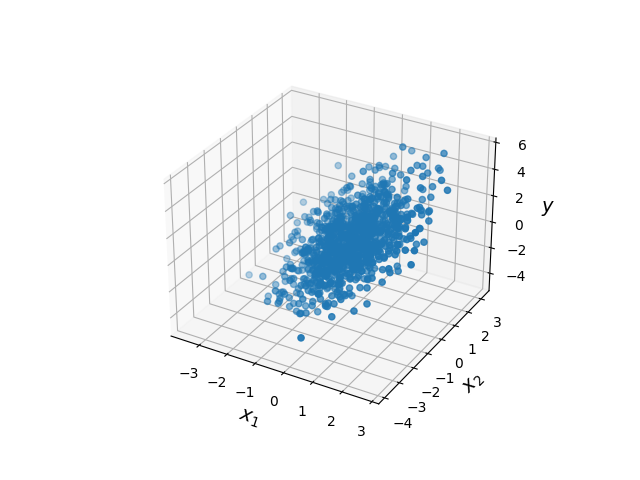

/tmp/ipykernel_14208/2295343763.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


Text(0.5, 0, '$y$')

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x1, x2, y_noisy, label='Função observável')
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$y$', fontsize=14)

In [5]:
def calculateErrorSurface(y, x1, x2):
    # Gera os valores dos parametros a1 e a2
    N = 200
    a1 = np.linspace(-2.0,4.0,N)
    a2 = np.linspace(-2.0,4.0,N)
    
    A1, A2 = np.meshgrid(a1, a2)
    
    # Pontos para realizar a plotagem da superfície da função de custo
    J = np.zeros((N, N))
    
    for iter1 in range(0, N):
        for iter2 in range(0, N):
            yhat = A1[iter1][iter2]*x1+A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y-yhat))
            
    return J, A1, A2

In [6]:
X = np.c_[x1,x2]

# Equação normal
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

yhat = X.dot(a_opt)

J_opt = (1.0/N)*np.sum(np.power((y_noisy-yhat),2))

<IPython.core.display.Javascript object>


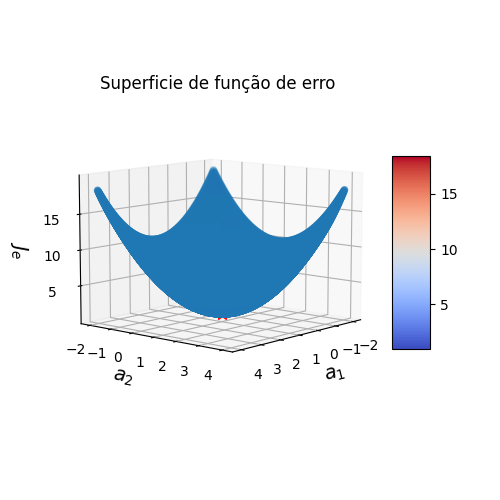

/tmp/ipykernel_14208/1916835692.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [11]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plotando a função de custo
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap = cm.coolwarm, linewidth=0, antialiased=False)

# Adicionando a barra de cores
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.plot(a_opt[0,0], a_opt[1,0], J_opt, c='r', marker='*', markersize=10)
ax.scatter(A1, A2, J, label='Função observável')
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Superficie de função de erro')
ax.view_init(20,45)
plt.savefig("erro_surface_exemple2.png", dpi=600)
plt.show()

## Análise com pesos diferentes para os Parâmetros X1 e X2

<center>
    <img src="img/pesosDistintos.png" alt="Drawing" style="width: 700px;height: 420px"/>
</center>